In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import fastai
from fastai.vision import *
from fastai.metrics import accuracy

In [3]:
path = "flowers/"; path

'flowers/'

In [4]:
tfms = get_transforms(max_rotate= 10.,max_zoom=1., max_lighting=0.20, do_flip=False,
                      max_warp=0., xtra_tfms=[flip_lr(), brightness(change=(0.3, 0.60), p=0.7), contrast(scale=(0.5, 2), p=0.7),
                                              crop_pad(size=600, padding_mode='border', row_pct=0.,col_pct=0.),
                                              rand_zoom(scale=(1.,1.5)), rand_crop(),
                                              perspective_warp(magnitude=(-0.1,0.1)),
                                              symmetric_warp(magnitude=(-0.1,0.1)) ])

In [5]:
src = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2, seed=42)
        .label_from_folder())

In [6]:
data = (src.transform(tfms, resize_method=ResizeMethod.CROP, padding_mode='border', size=128)
        .databunch(bs=64, num_workers=0)
        .normalize(imagenet_stats))

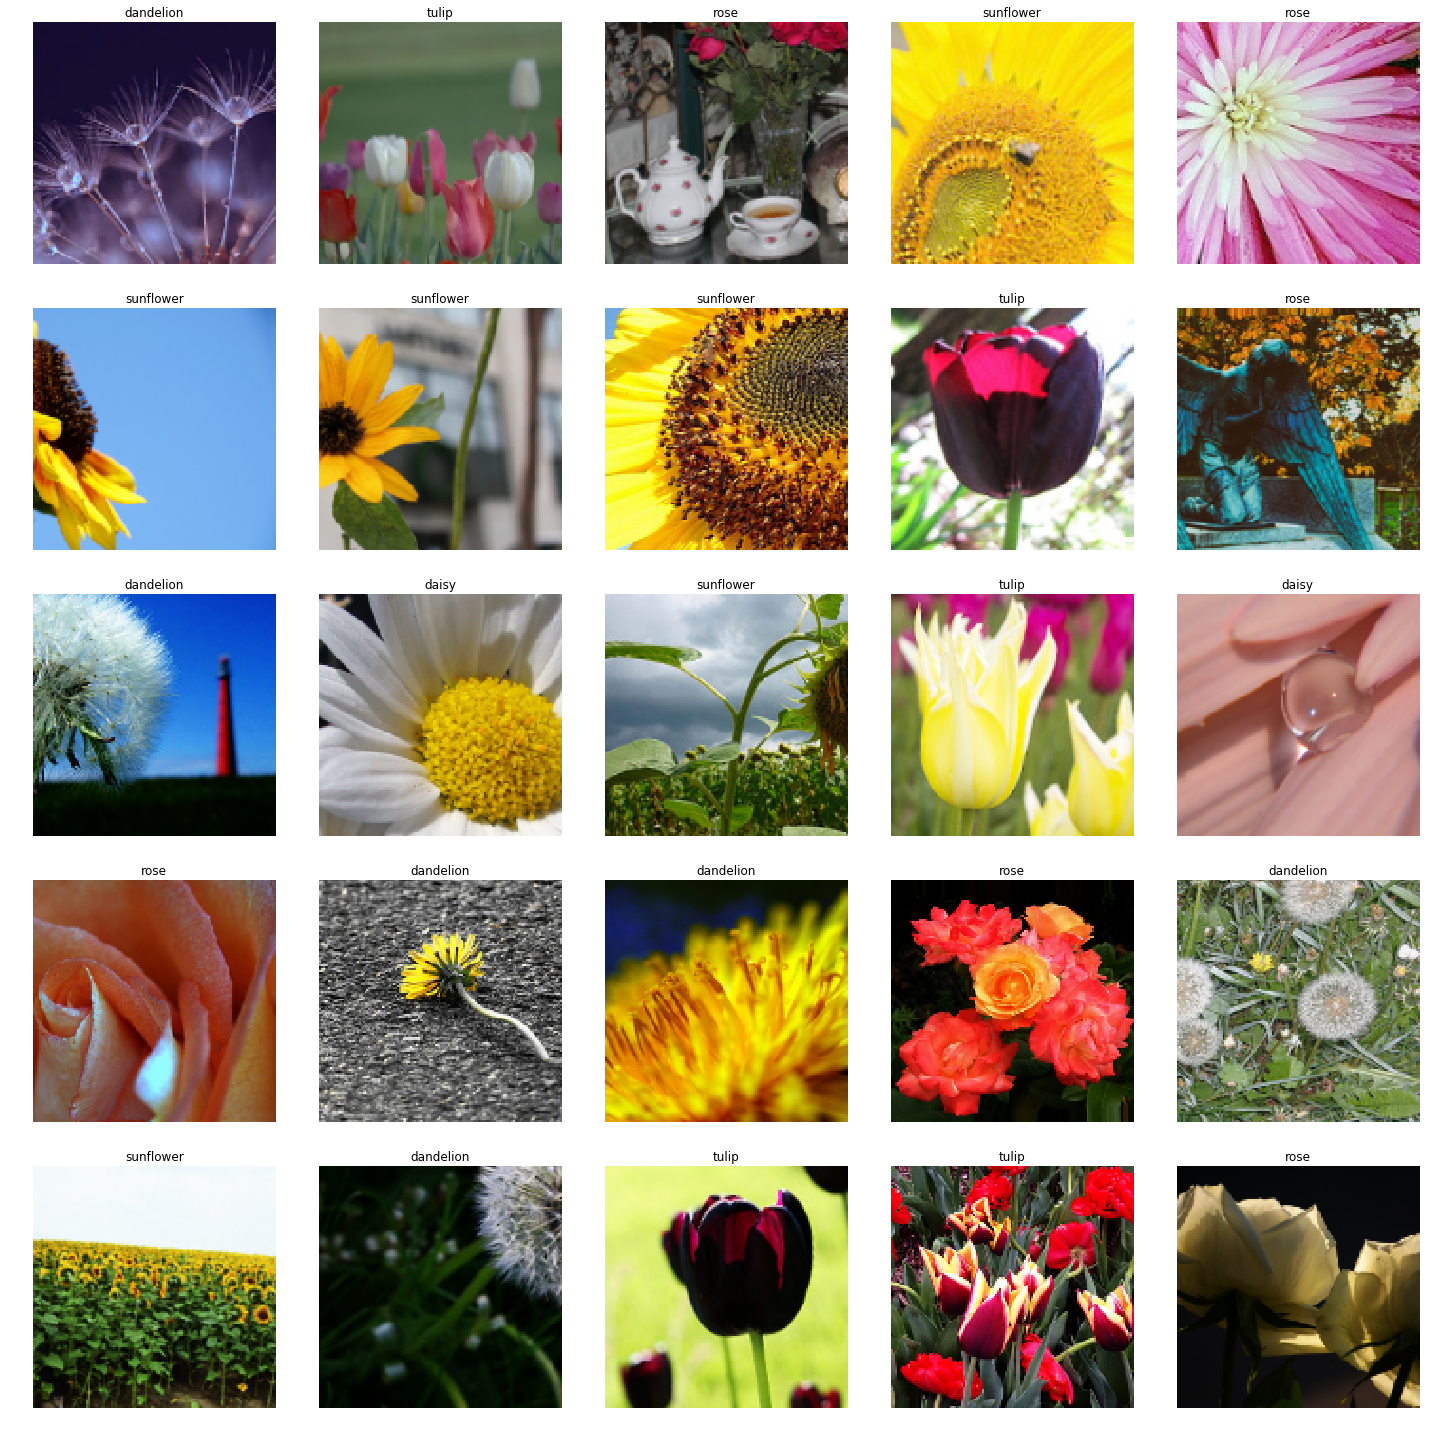

In [7]:
data.show_batch()

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, model_dir="/temp/model" ).mixup()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-04
Min loss divided by 10: 6.92E-03


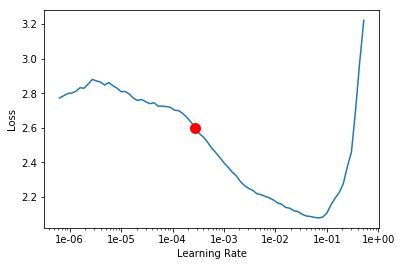

In [9]:
learn.freeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [10]:
learn.fit_one_cycle(2, max_lr=slice(1e-03, 1e-01), wd = (1e-6, 1e-4, 1e-2), pct_start=0.5)

epoch,train_loss,valid_loss,accuracy,time
0,1.748407,0.803321,0.777778,01:03
1,1.226296,0.412329,0.868056,01:01


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 3.31E-05


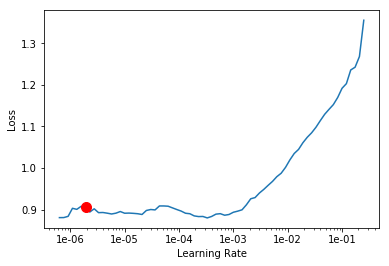

In [11]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [13]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4), wd=(1e-6, 1e-4, 1e-2), pct_start=0.5)

epoch,train_loss,valid_loss,accuracy,time
0,0.875457,0.386630,0.873843,01:14
1,0.851995,0.360023,0.883102,01:12


In [14]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

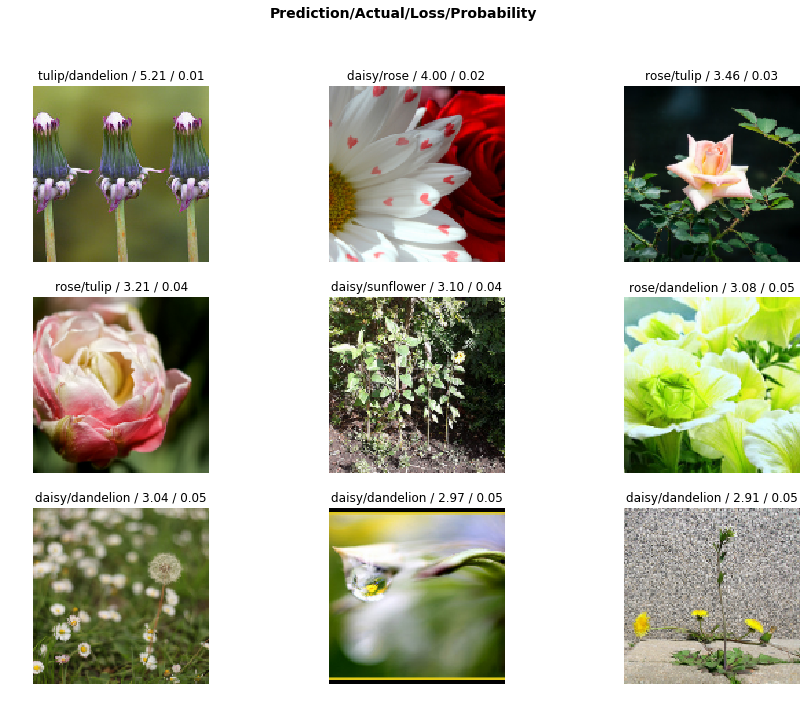

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

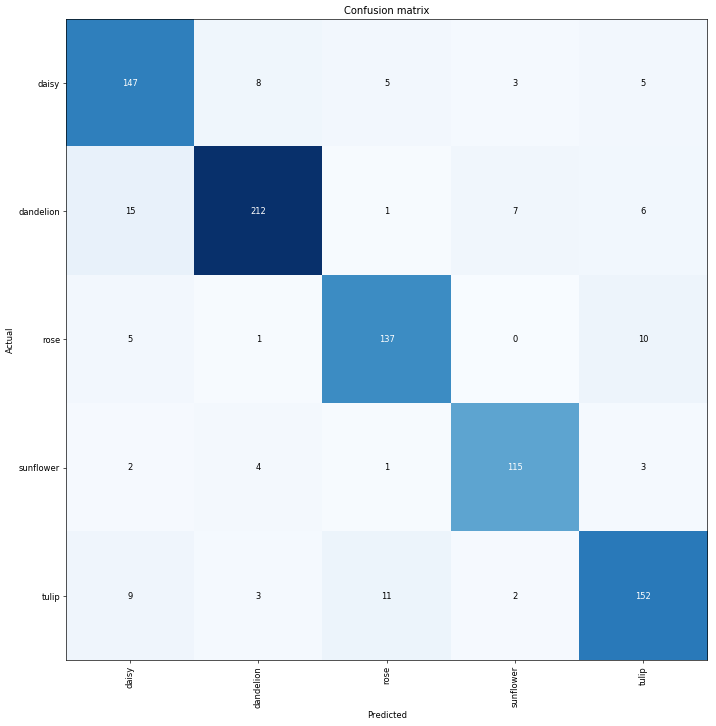

In [16]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)